In [1]:
# define the path of the data and project
data_path = 'D:/VScode/MRes/scienceweb.whoi.edu/itp/data/'

In [2]:
# read the cleaned xarray from local file
import xarray as xr
ds_cleaned_750=xr.open_dataset(f"{data_path}/ds_cleaned_750.nc")
ds_cleaned_750

<xarray.Dataset>
Dimensions:           (nprof: 44692, pressure: 148)
Coordinates:
    profiler          (nprof) object ...
    date              (nprof) datetime64[ns] ...
    lon               (nprof) float64 ...
    lat               (nprof) float64 ...
  * pressure          (pressure) float64 -10.0 -15.0 -20.0 ... -740.0 -745.0
Dimensions without coordinates: nprof
Data variables:
    temperature       (nprof, pressure) float64 ...
    salinity          (nprof, pressure) float64 ...
    dissolved_oxygen  (nprof, pressure) float64 ...

In [12]:
ds_cleaned_750.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:           (nprof: 44692, pressure: 148)
Coordinates:
    profiler          (nprof) object ...
    date              (nprof) datetime64[ns] 2017-09-20T00:02:04.416000 ... 2...
    lon               (nprof) float64 ...
    lat               (nprof) float64 ...
  * pressure          (pressure) float64 -10.0 -15.0 -20.0 ... -740.0 -745.0
Dimensions without coordinates: nprof
Data variables:
    temperature       (nprof, pressure) float64 ...
    salinity          (nprof, pressure) float64 ...
    dissolved_oxygen  (nprof, pressure) float64 ...>

In [7]:
# function that plot three histograms, the first is the month distribution, the second and third are the longtidue and latitude distribution
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(ds):
    months = ds.date.dt.month.values

    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
    fig, ax = plt.subplots(1,3,figsize=(20,5),dpi=300)
    sns.histplot(months,ax=ax[0])
    sns.histplot(ds.lon,ax=ax[1])
    sns.histplot(ds.lat,ax=ax[2])
    # set the x and y label
    ax[0].set_xlabel('Month')
    ax[0].set_ylabel('Count')
    ax[1].set_xlabel('Longitude')
    ax[1].set_ylabel('Count')
    ax[2].set_xlabel('Latitude')
    ax[2].set_ylabel('Count')
    # set the title
    ax[0].set_title('Month distribution')
    ax[1].set_title('Longitude distribution')
    ax[2].set_title('Latitude distribution')
    plt.show()


In [6]:
# function that plot the distribution of each month
import matplotlib.pyplot as plt
import seaborn as sns

def plot_monthly_distribution(ds):
    # group the dataset by month
    ds_monthly = ds.groupby('date.month')
    
    # plot the latitude and longitude distribution of each month
    fig, ax = plt.subplots(12,2,figsize=(20,10*12),dpi=300)
    for i in range(12):
        sns.histplot(ds_monthly[i+1].lon,ax=ax[i,0])
        sns.histplot(ds_monthly[i+1].lat,ax=ax[i,1])
        ax[i,0].set_xlabel('Longitude')
        ax[i,0].set_ylabel('Count')
        ax[i,0].set_title(f'Month {i+1}')
        ax[i,1].set_xlabel('Latitude')
        ax[i,1].set_ylabel('Count')
        ax[i,1].set_title(f'Month {i+1}')
    plt.show()


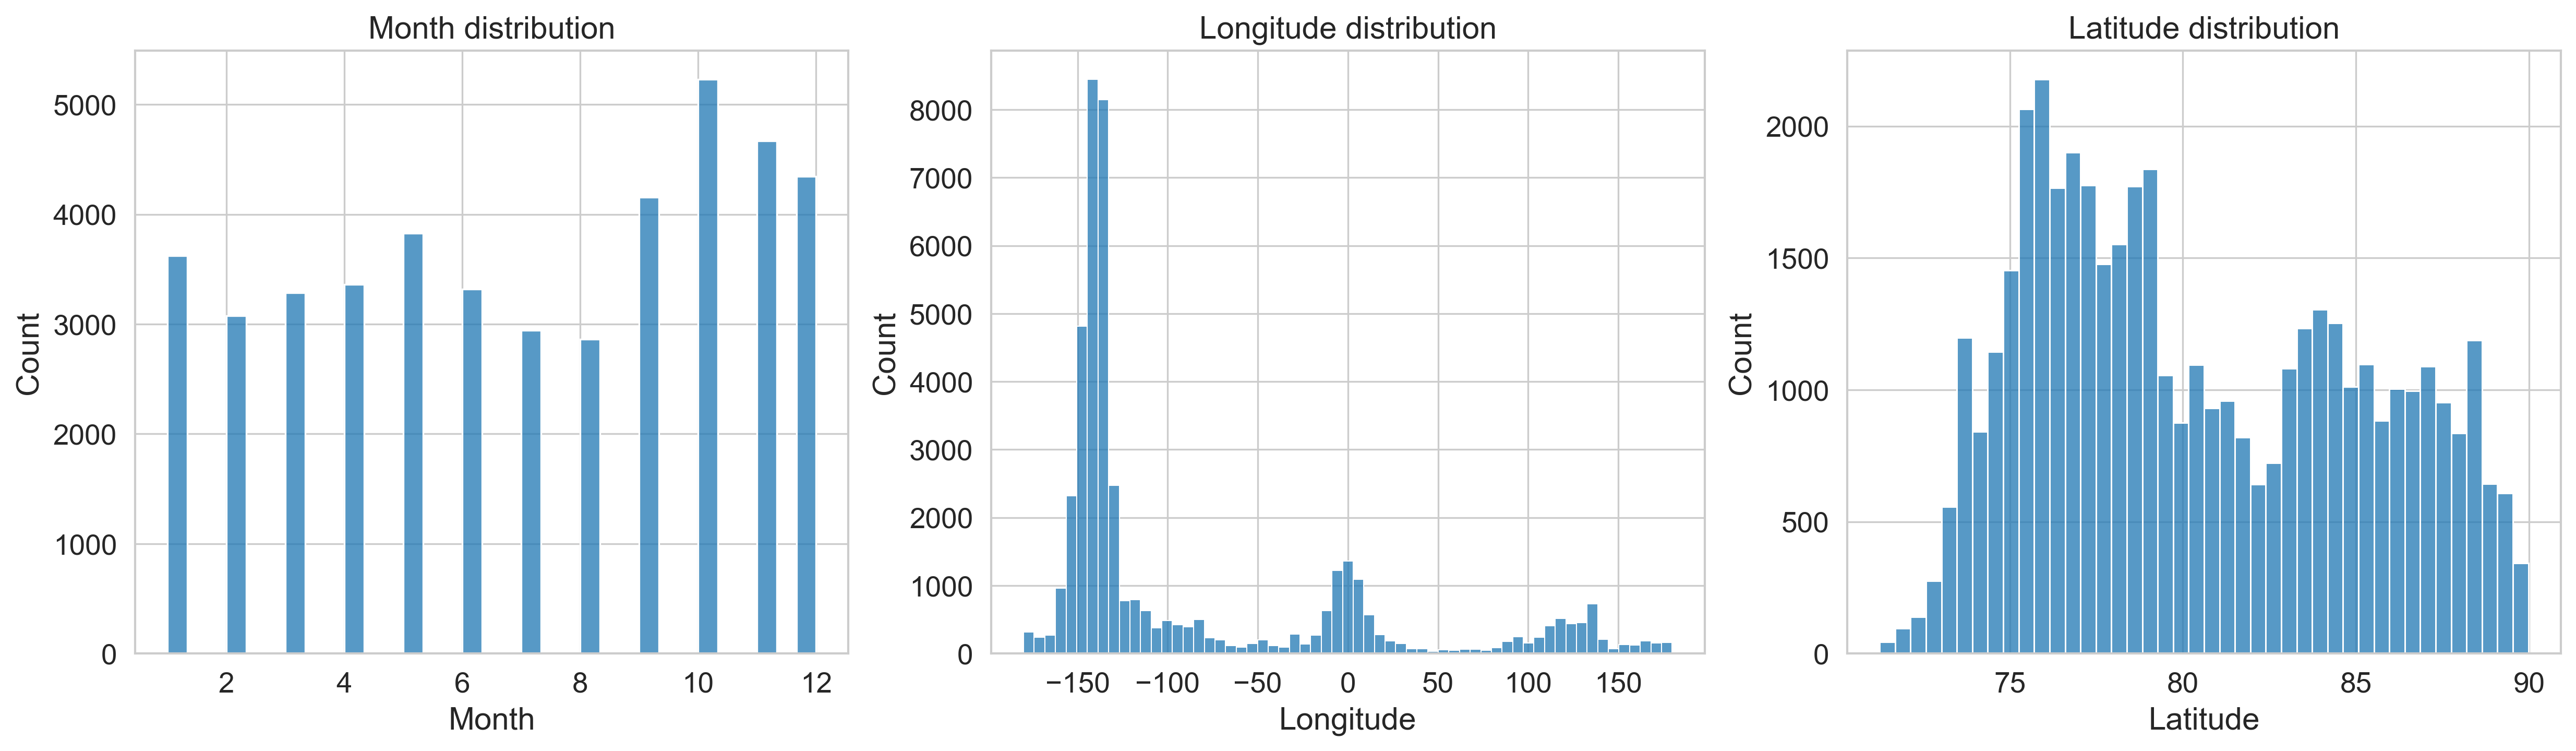

In [27]:
plot_distribution(ds_cleaned_750)


In [29]:
plot_monthly_distribution(ds_cleaned_750)



In [12]:
# import numpy as np
# import xarray as xr

# def random_select(ds, ratio, random_seed=None):
#     if ratio < 0 or ratio > 1:
#         raise ValueError("Ratio must be between 0 and 1.")
        
#     if 'date' not in ds:
#         raise ValueError("Input dataset must have a 'date' variable.")
        
#     if 'nprof' not in ds.dims:
#         raise ValueError("Input dataset must have a 'nprof' dimension.")
    
#     # group the dataset by month
#     ds_monthly = ds.groupby('date.month')
#     months_with_data = [month for month in ds_monthly.groups.keys() if len(ds_monthly[month]) > 0]
    
#     if not months_with_data:
#         raise ValueError("Input dataset does not contain any data.")
    
  
#     ds_selected = xr.concat([ds_monthly[month].isel(nprof=np.random.default_rng(random_seed).choice(ds_monthly[month].nprof.size, int(ds_monthly[month].nprof.size*ratio), replace=False)) for month in months_with_data], dim='nprof')
#     ds_selected['nprof'] = np.arange(ds_selected.sizes['nprof'])
    
#     return ds_selected


In [17]:
import numpy as np
import xarray as xr

def random_select(ds, ratio, random_seed=None):
    if ratio < 0 or ratio > 1:
        raise ValueError("Ratio must be between 0 and 1.")
        
    if 'date' not in ds:
        raise ValueError("Input dataset must have a 'date' variable.")
        
    if 'nprof' not in ds.dims:
        raise ValueError("Input dataset must have a 'nprof' dimension.")
    
    # group the dataset by month
    ds_monthly = ds.groupby('date.month')
    months_with_data = [month for month in ds_monthly.groups.keys() if len(ds_monthly[month]) > 0]
    
    if not months_with_data:
        raise ValueError("Input dataset does not contain any data.")
    
    # find the month with the smallest amount of data
    smallest_month_size = np.min([ds_monthly[month].nprof.size for month in months_with_data])
    selected_size_monthly=ds.nprof.size*ratio/12
    
    if smallest_month_size < selected_size_monthly:
        ratio=smallest_month_size/ds.nprof.size*12
        print(f"Ratio is too large, the ratio is set to {ratio}")
    

    print(f"Ratio is {ratio}, {int(selected_size_monthly)} profiles are selected from each month")
    # sample a fixed amount of data from each month
    ds_selected = xr.concat([ds_monthly[month].isel(nprof=np.random.default_rng(random_seed).choice(ds_monthly[month].nprof.size, int(selected_size_monthly), replace=False)) for month in months_with_data], dim='nprof')
    
    ds_selected['nprof'] = np.arange(ds_selected.sizes['nprof'])
    
    return ds_selected


In [18]:
# select 10% of the data
ds_cleaned_750_selected = random_select(ds_cleaned_750, 0.3, random_seed=0)
ds_cleaned_750_selected

Ratio is 0.3, 1117 profiles are selected from each month


<xarray.Dataset>
Dimensions:           (nprof: 13404, pressure: 148)
Coordinates:
    profiler          (nprof) object itp29grd0261 itp86grd0302 ... itp8grd0259
    date              (nprof) datetime64[ns] 2009-01-10T00:00:05.184000 ... 2...
    lon               (nprof) float64 -156.5 -148.2 -143.1 ... -91.1 -138.4
    lat               (nprof) float64 83.25 75.98 75.94 ... 85.86 88.34 80.06
  * pressure          (pressure) float64 -10.0 -15.0 -20.0 ... -740.0 -745.0
  * nprof             (nprof) int32 0 1 2 3 4 ... 13399 13400 13401 13402 13403
Data variables:
    temperature       (nprof, pressure) float64 -1.687 -1.687 ... 0.263 0.2523
    salinity          (nprof, pressure) float64 30.82 30.82 ... 34.87 34.87
    dissolved_oxygen  (nprof, pressure) float64 385.5 385.2 385.3 ... nan nan

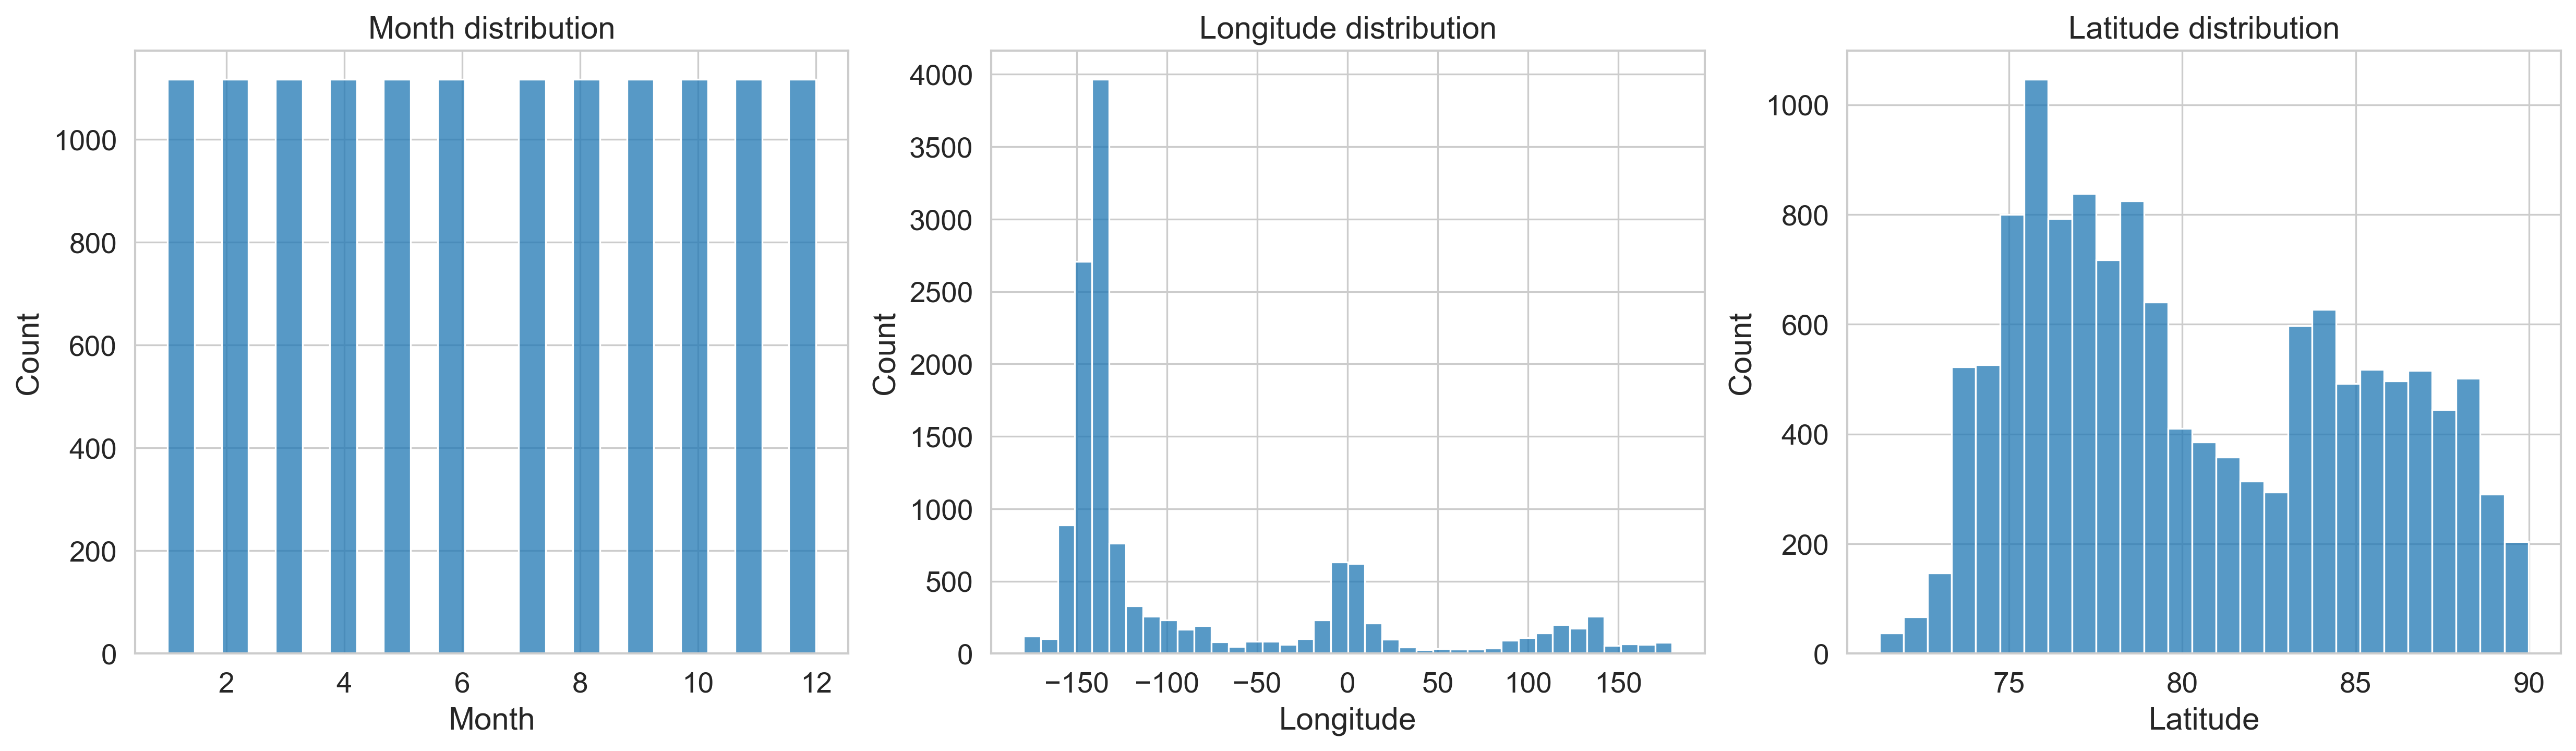

In [19]:
plot_distribution(ds_cleaned_750_selected)

In [1]:
import cartopy

ModuleNotFoundError: No module named 'cartopy'

In [20]:
import plot_toolbox as ptb
ptb.plot_data_location(ds_cleaned_750,dpi=100)

ModuleNotFoundError: No module named 'cartopy'

In [ ]:
ptb.plot_data_location(ds_cleaned_750_selected,dpi=100)

In [3]:
# read the cleaned xarray from local file
import xarray as xr
ds_cleaned_250=xr.open_dataset(f"{data_path}/ds_cleaned_250.nc")
ds_cleaned_250

<xarray.Dataset>
Dimensions:           (nprof: 67040, pressure: 48)
Coordinates:
    profiler          (nprof) object ...
    date              (nprof) datetime64[ns] ...
    lon               (nprof) float64 ...
    lat               (nprof) float64 ...
  * pressure          (pressure) float64 -10.0 -15.0 -20.0 ... -240.0 -245.0
Dimensions without coordinates: nprof
Data variables:
    temperature       (nprof, pressure) float64 ...
    salinity          (nprof, pressure) float64 ...
    dissolved_oxygen  (nprof, pressure) float64 ...

In [3]:
# read the cleaned xarray from local file
import xarray as xr
ds_cleaned=xr.open_dataset(f"{data_path}/ds_cleaned.nc")

In [4]:
ds_cleaned

<xarray.Dataset>
Dimensions:      (nprof: 47890, pressure: 99)
Coordinates:
    profiler     (nprof) int32 ...
    date         (nprof) datetime64[ns] ...
    lon          (nprof) float64 ...
    lat          (nprof) float64 ...
  * pressure     (pressure) float64 -10.0 -15.0 -20.0 ... -490.0 -495.0 -500.0
Dimensions without coordinates: nprof
Data variables:
    temperature  (nprof, pressure) float64 ...
    salinity     (nprof, pressure) float64 ...

In [10]:
ds_cleaned.info()

xarray.Dataset {
dimensions:
	nprof = 47890 ;
	pressure = 99 ;

variables:
	float64 temperature(nprof, pressure) ;
	float64 salinity(nprof, pressure) ;
	int32 profiler(nprof) ;
	datetime64[ns] date(nprof) ;
	float64 lon(nprof) ;
	float64 lat(nprof) ;
	float64 pressure(pressure) ;

// global attributes:
}

In [4]:
# calculate the mean profile and plot it
import plotly.graph_objs as go
from plotly.subplots import make_subplots

mean_temperature = ds_cleaned['temperature'].mean(dim='nprof')
lower_temperature = ds_cleaned['temperature'].quantile(q=0.05, dim='nprof')
upper_temperature = ds_cleaned['temperature'].quantile(q=0.95, dim='nprof')

mean_salinity = ds_cleaned['salinity'].mean(dim='nprof')
lower_salinity = ds_cleaned['salinity'].quantile(q=0.05, dim='nprof')
upper_salinity = ds_cleaned['salinity'].quantile(q=0.95, dim='nprof')

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Scatter(x=mean_temperature, y=ds_cleaned['pressure'], mode='lines', name='Mean', showlegend=True, line=dict(color='tomato')), row=1, col=1)
fig.add_trace(go.Scatter(x=lower_temperature, y=ds_cleaned['pressure'], mode='lines', name='5th Percentile', showlegend=True, line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=upper_temperature, y=ds_cleaned['pressure'], mode='lines', name='95th Percentile', showlegend=True, line=dict(color='blue')), row=1, col=1)
fig.update_xaxes(title_text='Temperature (°C)', row=1, col=1)
fig.update_yaxes(title_text='Pressure (dbar)', row=1, col=1)


fig.add_trace(go.Scatter(x=mean_salinity, y=ds_cleaned['pressure'], mode='lines', name='Mean', showlegend=False, line=dict(color='tomato')), row=1, col=2)
fig.add_trace(go.Scatter(x=lower_salinity, y=ds_cleaned['pressure'], mode='lines', name='5th Percentile', showlegend=False, line=dict(color='blue')), row=1, col=2)
fig.add_trace(go.Scatter(x=upper_salinity, y=ds_cleaned['pressure'], mode='lines', name='95th Percentile', showlegend=False, line=dict(color='blue')), row=1, col=2)
fig.update_xaxes(title_text='Salinity', row=1, col=2)
# fig.update_yaxes(title_text='Pressure (dbar)', row=1, col=2)
fig.update_layout(title='Mean Profile', title_x=0.45, width=800, height=700)

fig.show()


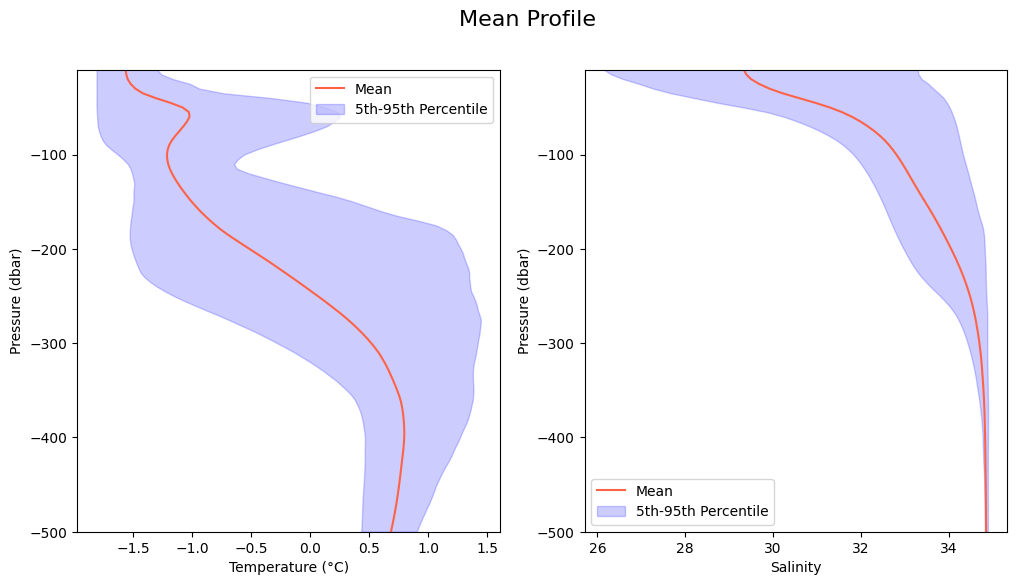

In [17]:
import matplotlib.pyplot as plt
import numpy as np

mean_temperature = ds_cleaned['temperature'].mean(dim='nprof')
lower_temperature = ds_cleaned['temperature'].quantile(q=0.05, dim='nprof')
upper_temperature = ds_cleaned['temperature'].quantile(q=0.95, dim='nprof')

mean_salinity = ds_cleaned['salinity'].mean(dim='nprof')
lower_salinity = ds_cleaned['salinity'].quantile(q=0.05, dim='nprof')
upper_salinity = ds_cleaned['salinity'].quantile(q=0.95, dim='nprof')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axs[0].plot(mean_temperature, ds_cleaned['pressure'], color='tomato', label='Mean')
axs[0].fill_betweenx(ds_cleaned['pressure'], lower_temperature, upper_temperature, alpha=0.2, color='blue', label='5th-95th Percentile')
axs[0].set_xlabel('Temperature (°C)')
axs[0].set_ylabel('Pressure (dbar)')
axs[0].set_ylim(np.max(ds_cleaned['pressure']), np.min(ds_cleaned['pressure']))
axs[0].invert_yaxis()
axs[0].legend()

axs[1].plot(mean_salinity, ds_cleaned['pressure'], color='tomato', label='Mean')
axs[1].fill_betweenx(ds_cleaned['pressure'], lower_salinity, upper_salinity, alpha=0.2, color='blue', label='5th-95th Percentile')
axs[1].set_xlabel('Salinity')
axs[1].set_ylabel('Pressure (dbar)')
axs[1].set_ylim(np.max(ds_cleaned['pressure']), np.min(ds_cleaned['pressure']))
axs[1].invert_yaxis()
axs[1].legend()

fig.suptitle('Mean Profile', fontsize=16)
plt.show()


In [6]:
ds_cleaned['temperature'][0]

<xarray.DataArray 'temperature' (pressure: 99)>
array([-1.4952  , -1.4949  , -1.3418  , -1.396458, -1.3822  , -1.1548  ,
       -0.8613  , -0.2885  , -0.226418, -0.147373, -0.2642  , -0.418073,
       -0.6225  , -0.7894  , -0.9048  , -0.992464, -1.1089  , -1.132   ,
       -1.1448  , -1.1674  , -1.2359  , -1.2704  , -1.313109, -1.3486  ,
       -1.410736, -1.388   , -1.441   , -1.4901  , -1.478664, -1.5145  ,
       -1.527464, -1.5299  , -1.526   , -1.5162  , -1.4989  , -1.4719  ,
       -1.4024  , -1.3219  , -1.235736, -1.1913  , -1.1269  , -1.0348  ,
       -0.9378  , -0.8557  , -0.767   , -0.662   , -0.5955  , -0.5303  ,
       -0.4518  , -0.3984  , -0.3439  , -0.256018, -0.1421  , -0.0716  ,
       -0.006664,  0.0811  ,  0.148345,  0.202   ,  0.235   ,  0.3009  ,
        0.3697  ,  0.411909,  0.4768  ,  0.477   ,  0.522718,  0.5803  ,
        0.587682,  0.628   ,  0.651273,  0.6726  ,  0.6823  ,  0.714318,
        0.7344  ,  0.736318,  0.7543  ,  0.759264,  0.7589  ,  0.7586  ,
        0.758436,  0.790927,  0.8184  ,  0.8214  ,  0.828109,  0.8466  ,
        0.8468  ,  0.8469  ,  0.845236,  0.843345,  0.841   ,  0.854427,
        0.849782,  0.841218,  0.8308  ,  0.8234  ,  0.8264  ,  0.8363  ,
        0.8325  ,  0.836118,  0.829018])
Coordinates:
    profiler  int32 ...
    date      datetime64[ns] ...
    lon       float64 ...
    lat       float64 ...
  * pressure  (pressure) float64 -10.0 -15.0 -20.0 ... -490.0 -495.0 -500.0

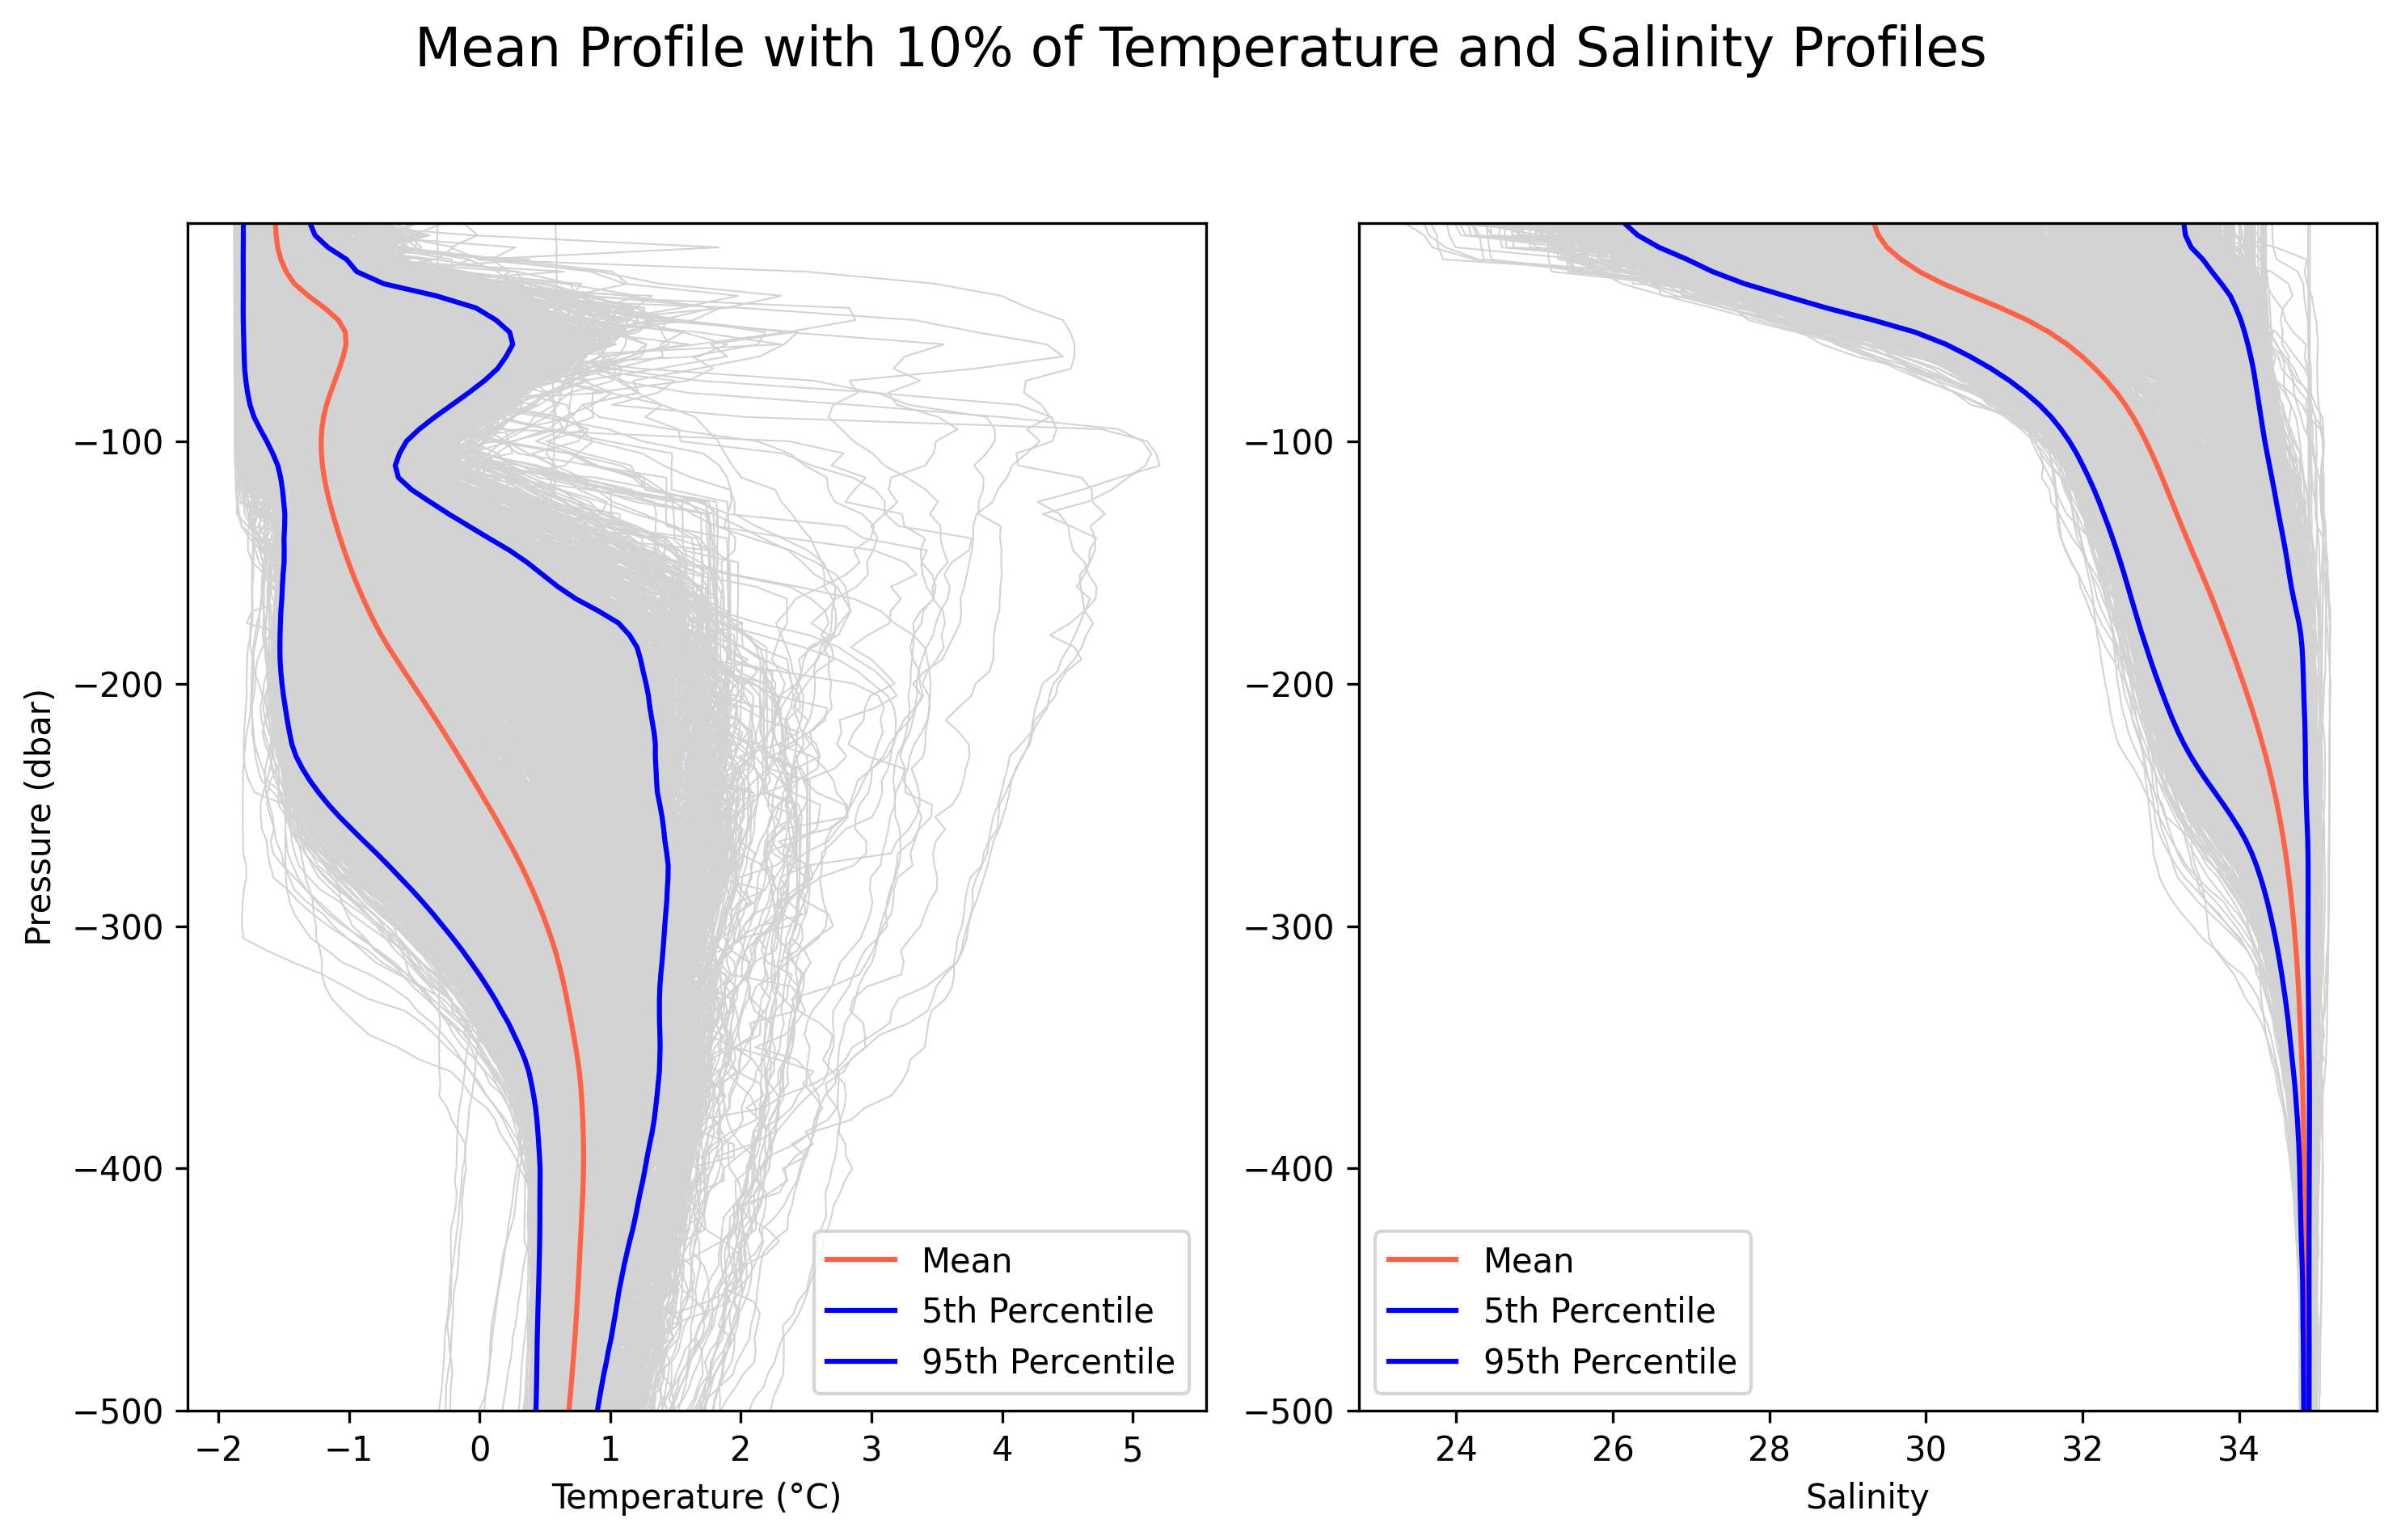

In [14]:
import random
import matplotlib.pyplot as plt

mean_temperature = ds_cleaned['temperature'].mean(dim='nprof')
lower_temperature = ds_cleaned['temperature'].quantile(q=0.05, dim='nprof')
upper_temperature = ds_cleaned['temperature'].quantile(q=0.95, dim='nprof')

mean_salinity = ds_cleaned['salinity'].mean(dim='nprof')
lower_salinity = ds_cleaned['salinity'].quantile(q=0.05, dim='nprof')
upper_salinity = ds_cleaned['salinity'].quantile(q=0.95, dim='nprof')

ratio = 0.1  # choose the percentage of profiles to plot
n_profiles = int(ds_cleaned.dims['nprof'] * ratio)
profile_indices = random.sample(range(ds_cleaned.dims['nprof']), n_profiles)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6),dpi=300)

# plot temperature profiles
for i in profile_indices:
    ax1.plot(ds_cleaned['temperature'][i].values, ds_cleaned['pressure'].values, color='lightgrey', linewidth=0.5)
ax1.plot(mean_temperature, ds_cleaned['pressure'], color='tomato', label='Mean')
ax1.plot(lower_temperature, ds_cleaned['pressure'], color='blue', label='5th Percentile')
ax1.plot(upper_temperature, ds_cleaned['pressure'], color='blue', label='95th Percentile')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Pressure (dbar)')
ax1.set_ylim(np.min(ds_cleaned['pressure']), np.max(ds_cleaned['pressure']))
# ax1.invert_yaxis()
# ax1.yaxis.set_ticks_position('both')
ax1.legend(loc='lower right')

# plot salinity profiles
for i in profile_indices:
    ax2.plot(ds_cleaned['salinity'][i].values, ds_cleaned['pressure'].values, color='lightgrey', linewidth=0.5)
ax2.plot(mean_salinity, ds_cleaned['pressure'], color='tomato', label='Mean')
ax2.plot(lower_salinity, ds_cleaned['pressure'], color='blue', label='5th Percentile')
ax2.plot(upper_salinity, ds_cleaned['pressure'], color='blue', label='95th Percentile')
ax2.set_xlabel('Salinity')
ax2.set_ylim(np.min(ds_cleaned['pressure']), np.max(ds_cleaned['pressure']))
# ax2.invert_yaxis()
# ax2.yaxis.set_ticks_position('both')
ax2.legend(loc='lower left')

fig.suptitle(f'Mean Profile with {int(ratio*100)}% of Temperature and Salinity Profiles', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


In [35]:
ds_cleaned

<xarray.Dataset>
Dimensions:      (nprof: 47890, pressure: 99)
Coordinates:
    profiler     (nprof) int32 ...
    date         (nprof) datetime64[ns] ...
    lon          (nprof) float64 ...
    lat          (nprof) float64 ...
  * pressure     (pressure) float64 -10.0 -15.0 -20.0 ... -490.0 -495.0 -500.0
Dimensions without coordinates: nprof
Data variables:
    temperature  (nprof, pressure) float64 -1.495 -1.495 -1.342 ... 0.422 0.4203
    salinity     (nprof, pressure) float64 27.8 27.81 28.08 ... 34.84 34.84

In [37]:
ds_cleaned.lon

<xarray.DataArray 'lon' (nprof: 47890)>
[47890 values with dtype=float64]
Coordinates:
    profiler  (nprof) int32 ...
    date      (nprof) datetime64[ns] ...
    lon       (nprof) float64 ...
    lat       (nprof) float64 ...
Dimensions without coordinates: nprof

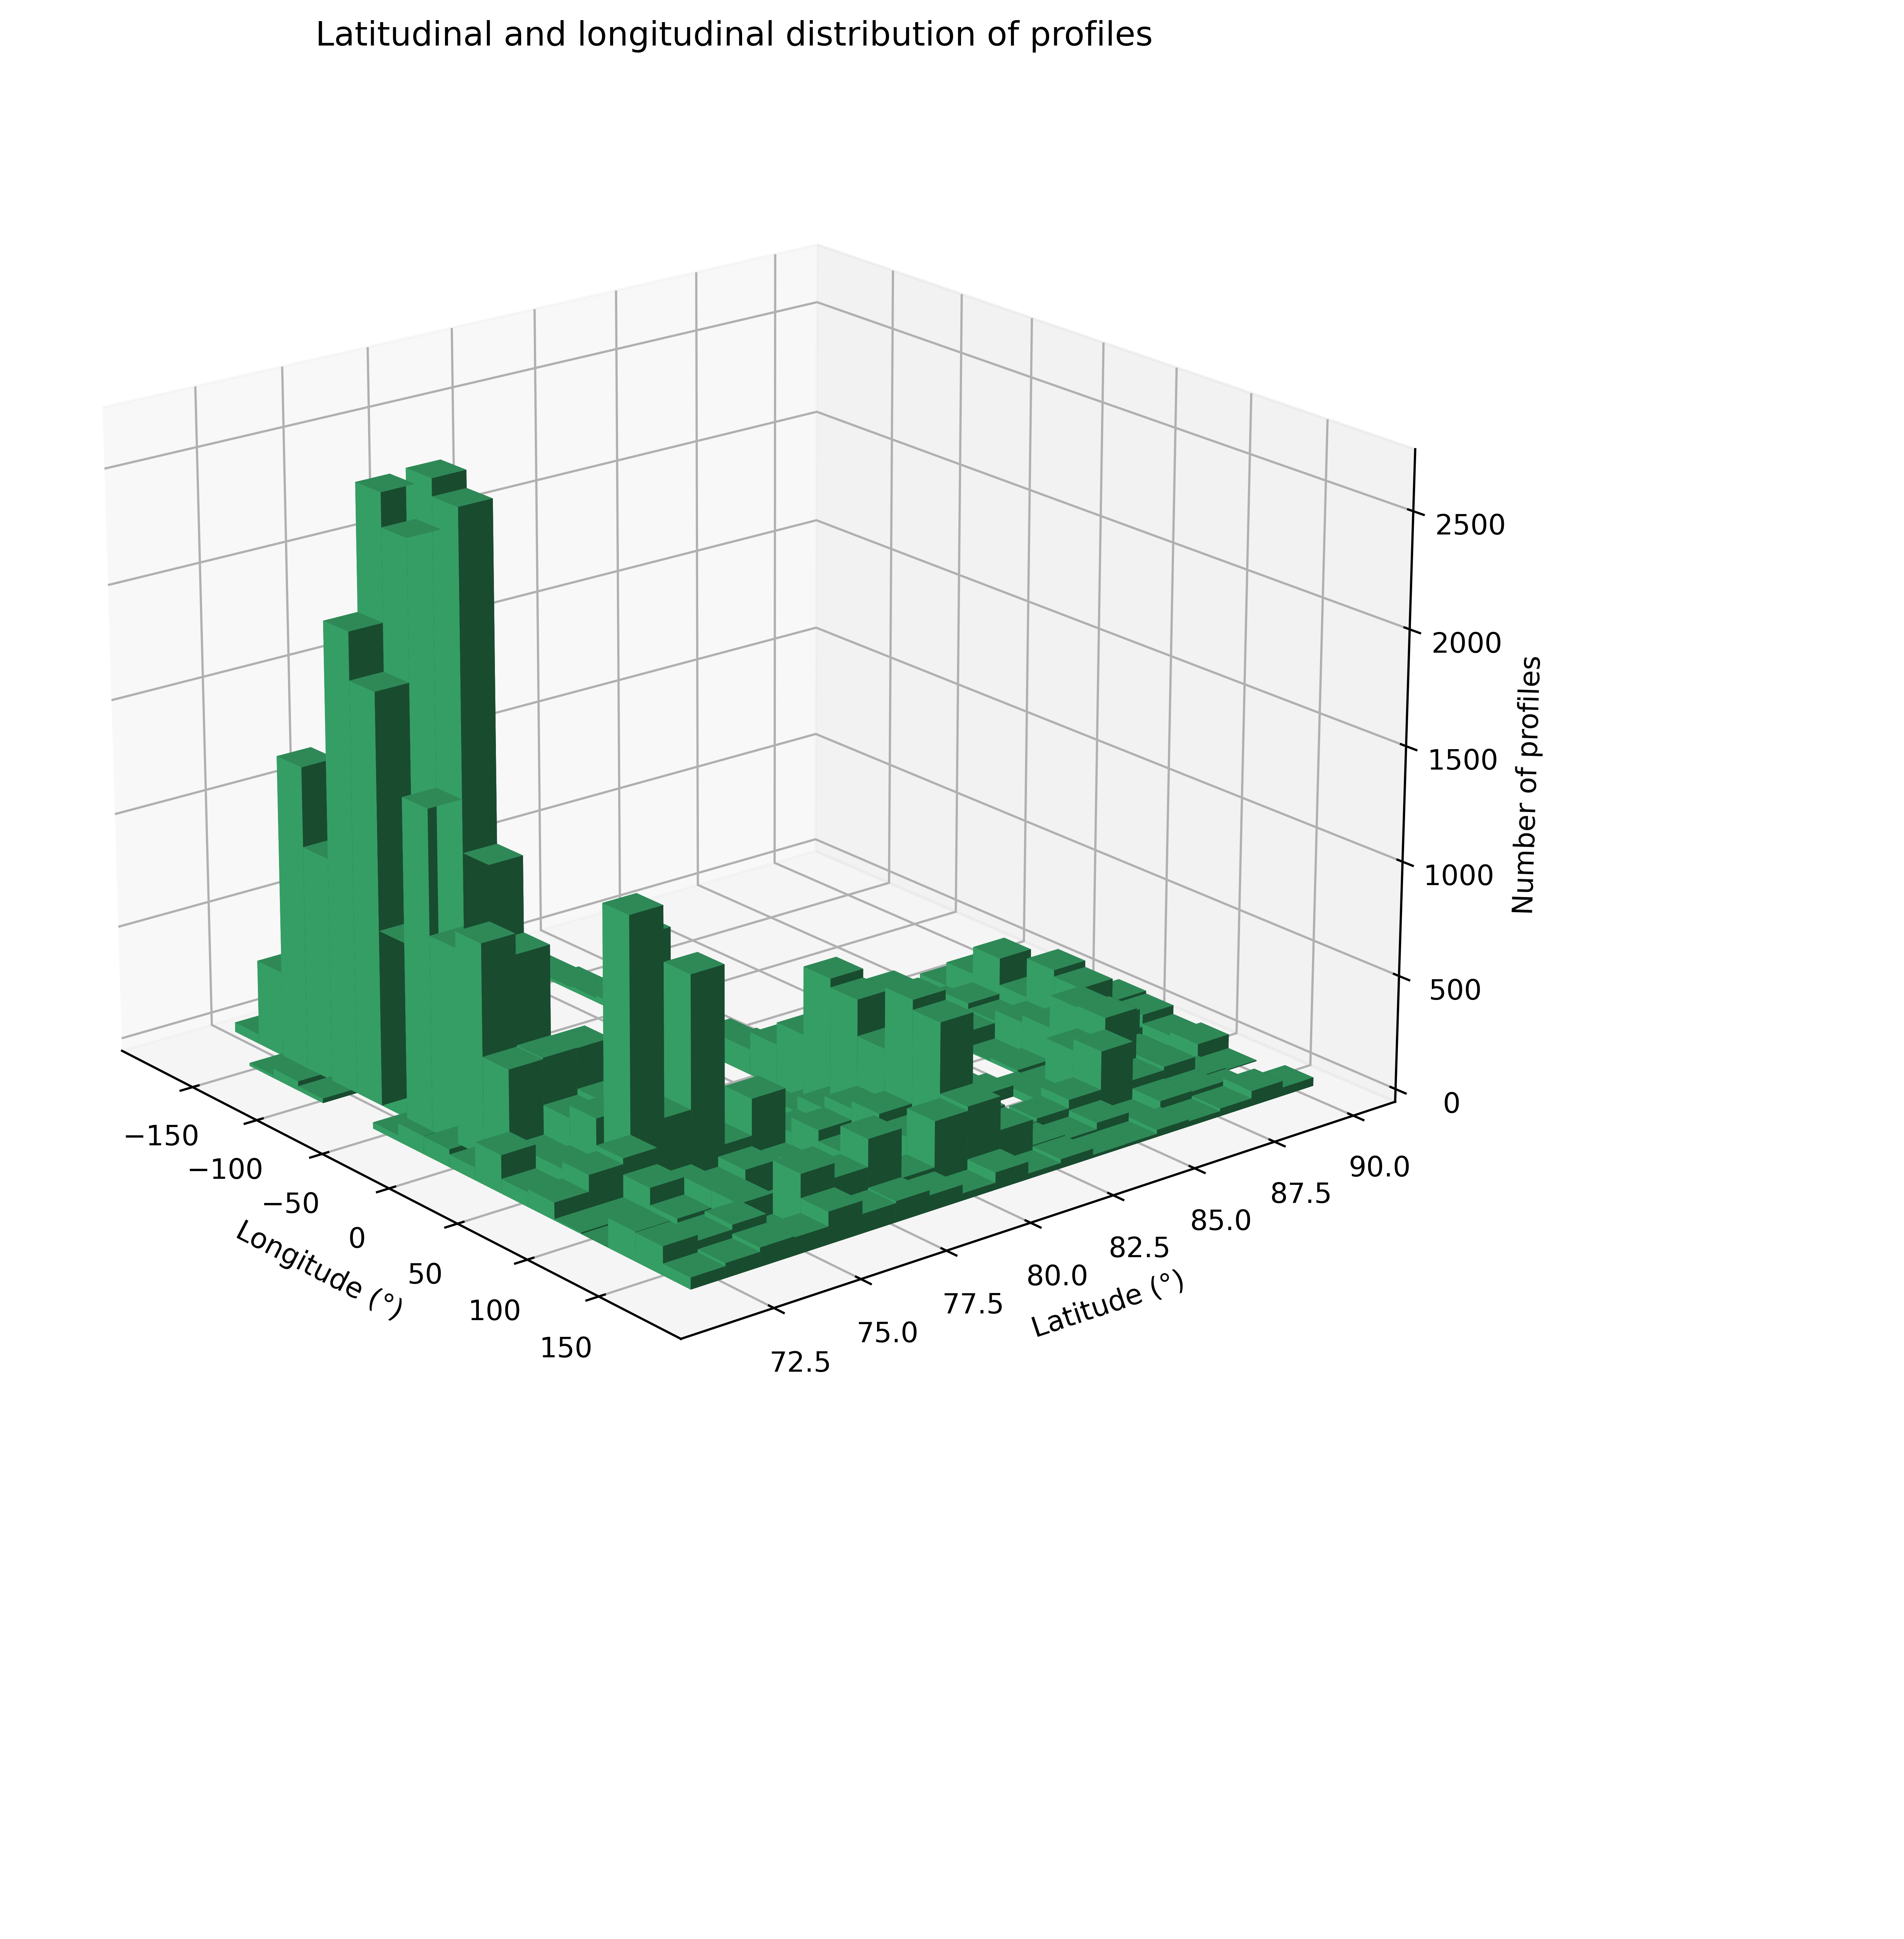

In [5]:
# plot the distribution of profiles in longitude and latitude
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec



# define bin edges for longitude, latitude, and pressure
lon_bins = np.linspace(ds_cleaned.lon.min(), ds_cleaned.lon.max(), 20)
lat_bins = np.linspace(ds_cleaned.lat.min(), ds_cleaned.lat.max(), 20)

# use the number of profiles in each bin as the height
H, xedges, yedges = np.histogram2d(ds_cleaned.lon, ds_cleaned.lat, bins=[lon_bins, lat_bins])

# set up the figure and the 3D axes
fig = plt.figure(figsize=(12,12),dpi=600)
fig.subplots_adjust(wspace=2,hspace=2)

gs = gridspec.GridSpec(5, 5)
ax = plt.subplot(gs[0:4, 0:4], projection='3d')
# ax = fig.add_subplot(221, projection='3d')

# create X and Y grids
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])

# create the bar plot, only for non-zero height values
colors = ['mediumseagreen' if h > 0 else 'none' for h in H.flatten()]
ax.view_init(elev=20, azim=-39)
ax.bar3d(X.flatten(), Y.flatten(), np.zeros(len(X.flatten())),
         dx=np.diff(xedges)[0], dy=np.diff(yedges)[0], dz=H.flatten(),
         color=colors, zsort='average')

# set the axis labels and title
ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')
ax.set_zlabel('Number of profiles')
ax.set_title('Latitudinal and longitudinal distribution of profiles')
ax = plt.subplot(gs[4, 4])
# ax=fig.add_subplot(122)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
# Remove box around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# show the plot
plt.show()




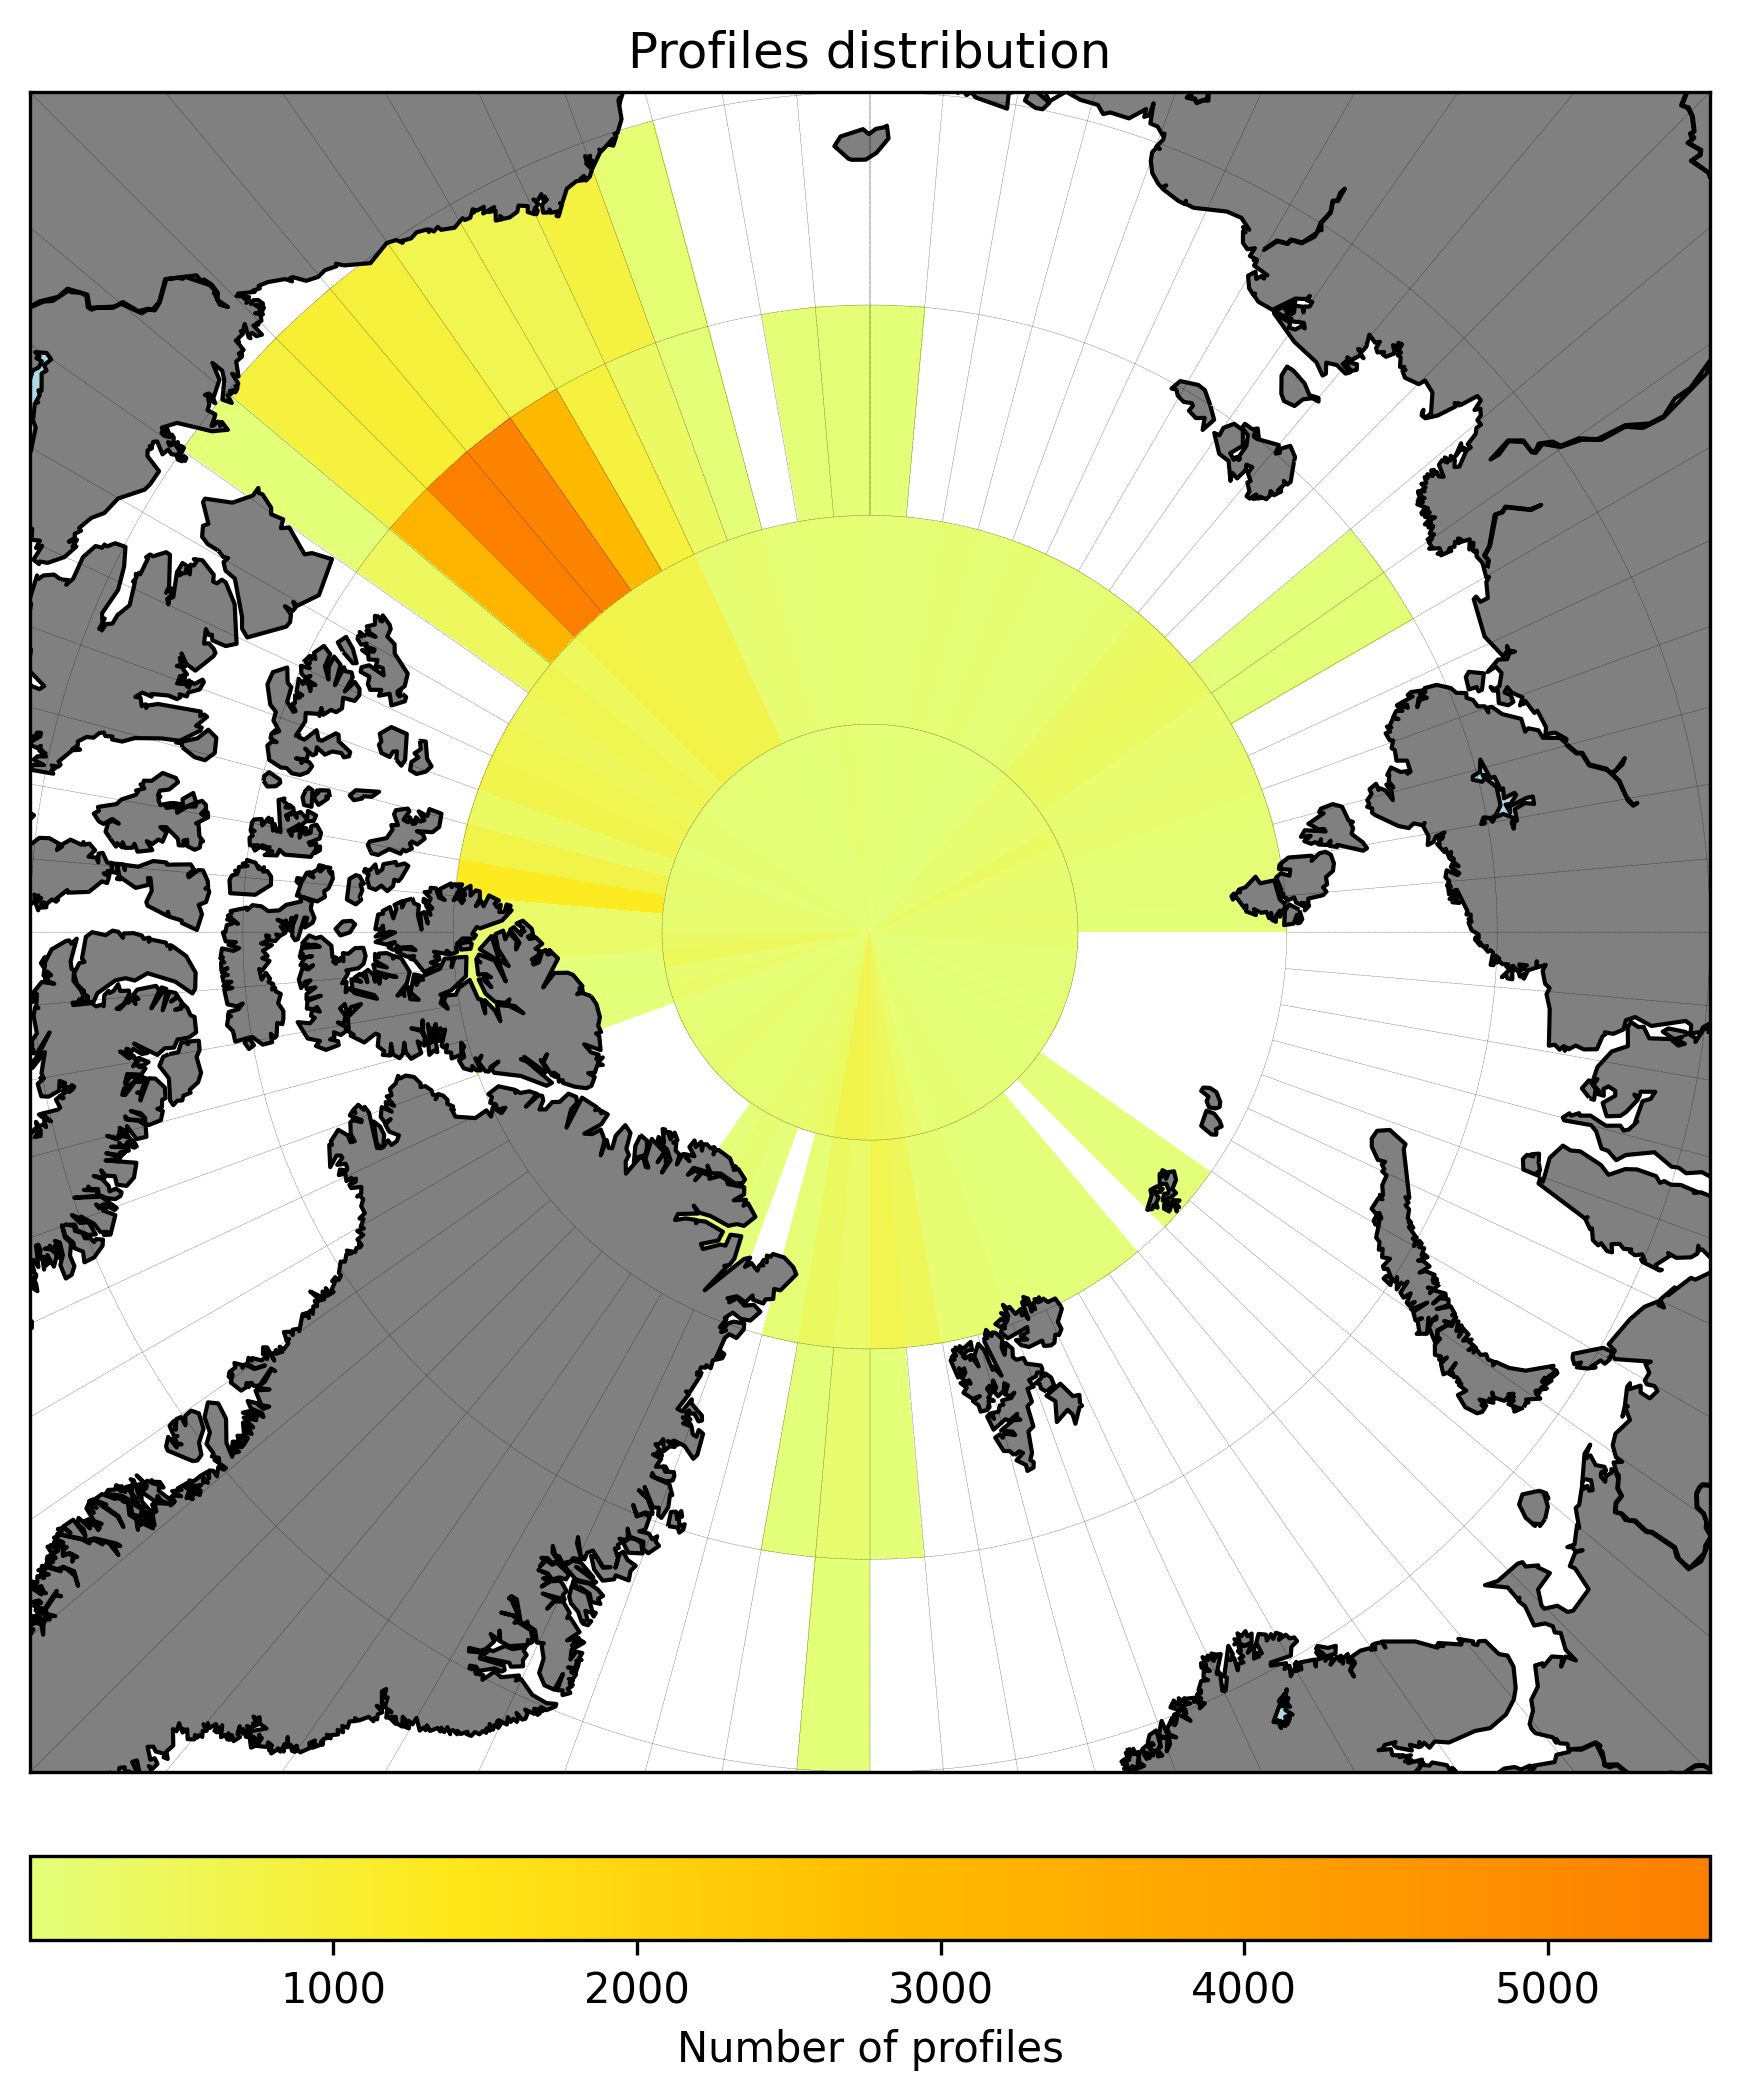

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Define the map bounds and resolution
lon_min, lon_max = -180, 180
lat_min, lat_max = 70, 90
latlon_step = 5
resolution = 'l'  # l for low resolution, h for high resolution

# Define bin edges for longitude, latitude, and pressure
lon_bins = np.arange(lon_min, lon_max+1, latlon_step)
lat_bins = np.arange(lat_min, lat_max+1, latlon_step)

# Use the number of profiles in each bin as the height
H, xedges, yedges = np.histogram2d(ds_cleaned.lon, ds_cleaned.lat, bins=[lon_bins, lat_bins])

# Set up the figure and the Basemap instance
fig = plt.figure(figsize=(8,8),dpi=300)
m = Basemap(projection='npstere', boundinglat=lat_min, lon_0=0, resolution=resolution)


m.drawparallels(np.arange(lat_min, lat_max+1, 5), labels=[], linewidth=0.1)
m.drawmeridians(np.arange(lon_min, lon_max+1, 5), labels=[], linewidth=0.1)


# Create the X and Y grids for the histogram
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])

new_col = np.arange(lat_min, lat_max, latlon_step)
Y = np.concatenate((Y, new_col[:, np.newaxis]), axis=1)

new_col = lon_max*np.ones(len(lat_bins)-1)
X = np.concatenate((X, new_col[:, np.newaxis]), axis=1)

new_row = X[-1]
X=np.vstack([X,new_row])

new_row = lat_max*np.ones(np.shape(Y)[1])
Y=np.vstack([Y,new_row])

# Create the colored grid using pcolormesh
cmap = plt.get_cmap('Wistia')
cmap.set_under(color='white', alpha=1.0)
cmap.set_over(color='white', alpha=1.0)



# levels = np.linspace(0, H.max(), 100)

# m.drawmapboundary(fill_color='aqua')

m.pcolormesh(X, Y, H.T, cmap=cmap, vmin=1, vmax=H.max(),latlon=True)

m.drawcoastlines()
m.fillcontinents(color='grey',lake_color='lightblue')

# m.bluemarble()

# m.shadedrelief()

# Add a colorbar
cbar = m.colorbar(location='bottom', pad="5%")
cbar.set_label('Number of profiles')


# Set the axis labels and title
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# set the tick labels empty
plt.xticks([])
plt.yticks([])
plt.title('Profiles distribution')


# Show the plot
plt.show()


In [3]:
# get the year and month from each date ds_cleaned.date 
years = ds_cleaned.date.dt.year.values
months = ds_cleaned.date.dt.month.values


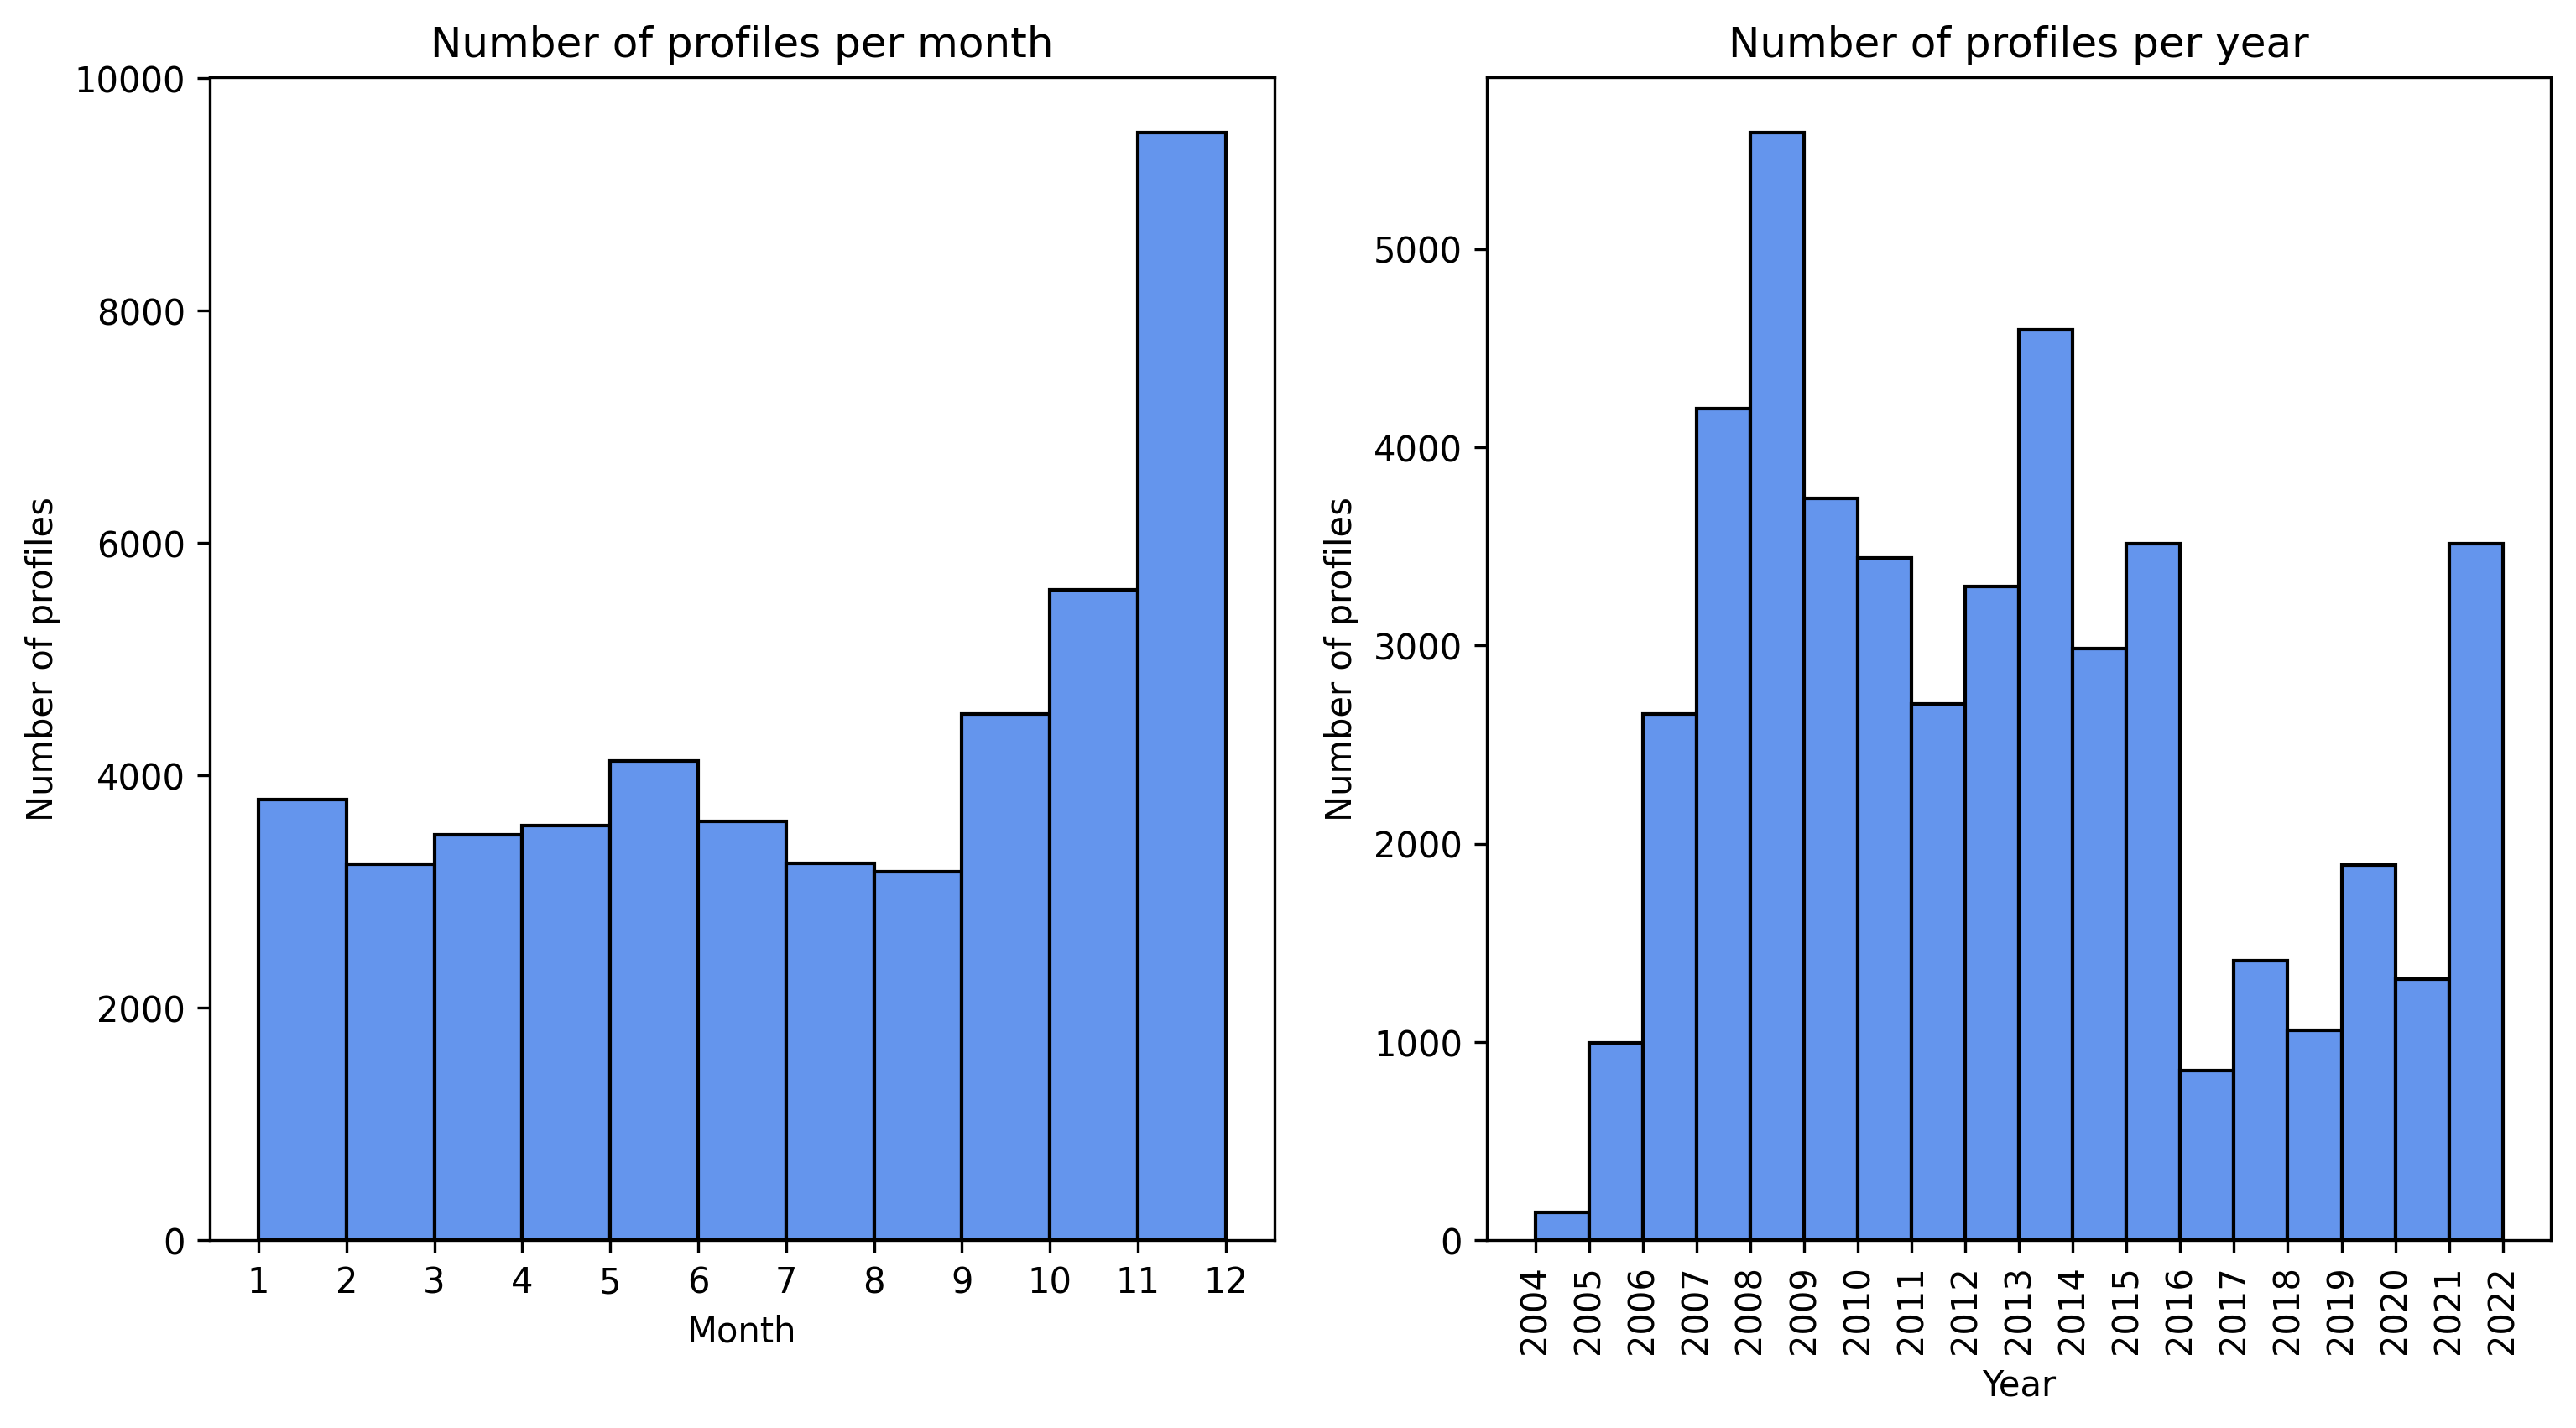

In [11]:
# plot a histogram of the number of profiles per month and a histogram of the number of profiles per year
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=300)

# Histogram of the number of profiles per month
bins_month = np.arange(1, 13)  # set bin edges
ax[0].hist(months, bins=bins_month, color='cornflowerblue', edgecolor='black', linewidth=1)
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Number of profiles')
ax[0].set_title('Number of profiles per month')
ax[0].set_xticks(np.arange(1, 13))

# Histogram of the number of profiles per year
bins_year = np.arange(np.min(years), np.max(years)+1)  # set bin edges 
ax[1].hist(years, bins=bins_year, color='cornflowerblue', edgecolor='black', linewidth=1)
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of profiles')
ax[1].set_title('Number of profiles per year')
ax[1].set_xticks(np.arange(np.min(years), np.max(years) + 1))
ax[1].set_xticklabels(np.arange(np.min(years), np.max(years) + 1), rotation=90) # rotate xticklabels by 90 degrees


plt.show()
